<p style="font-family: Arial; font-size:4.05em; color:darkblue; font-style:bold"><br>
Intelligent Data Analysis</p><br>

## Part I - Exploratory Analysis \#79  
Pavol Grofčík  
Denis Sobolev

In [31]:
#Importing of used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Showing graphs in a browser env
%matplotlib inline

<p style="font-family: Arial; font-size:2.95em; color:purple; font-style:bold"><br>
Content</p><br>

## Sections  
Analysis of each train dataset is divided into sections, shown below
* __Introduction__
* __Personal_train__
    * Reading & descriptive statistics upon data
    * Datatypes, Null/Nan values
    * Column distributions
    * Revealing intentional faults  
    
* __Other_train__
    * Reading & descriptive statistics upon data
    * Datatypes, Null/Nan values
    * Revealing intentional faults
    * Column distributions 
    * Analysis of Hormones
    * Formulated Hypothesis
    * Hormone correlation
    * Vizualization of results
    * Proposed methods of the next step - data cleansings & preprocessing
* __Conclusion__

<p style="font-family: Arial; font-size:2.95em; color:orange; font-style:bold"><br>
Introduction</p><br>

**Thyroid disease (THD)** is disease that affects mainly Thyroid gland - butterfly-shaped gland in the front of the neck (see below) and stimulates hormones production, which is important for body in a way it controls metabolism and other hormone production, even your heartbeats.  
Symptoms of the disease vary depending on the type. In general, there are two main types:
> **Hypothyroidsm** - as result of hormone deficit  
> **Hyperthyroidsm** - as result of hormone overproduction  


![image](http://wholehealthweb.com/wp-content/uploads/2016/11/bigstock-d-rendered-medically-accurat-136052459-thyroid-627x376.jpg)

### Hypothyroidism
Your thyroid does not make enough thyroid hormones. It is also called underactive thyroid. This slows down many of your body's functions, like your metabolism.

In order to prevent Hypothyroidsm, our hypophysis located in front cerebral, stimulates production of TSH - *thyroid stimulating hormone*, which affects secretion of T4 hormone, which divides into two types: 
> **TT4** - Total amount  
> **T4U** - Unbound amount

### Hyperthyroidsm  
Means overactivation of thyroid, causes your thyroid to make more thyroid hormone than your body needs. This speeds up many of your body's functions, like your metabolism and heart rate.

**In this analysis, we will explore our datasets, especially hormone levels and finally, we will test proposed hypothesis to prove correlation and dependencies among them and verify them based on medical literature & physician's utterance.**

<p style="font-family: Arial; font-size:2.95em; color:purple; font-style:bold"><br>
Personal_train dataset</p><br>

### Reading & descriptive statistics

In [5]:
df_personal = pd.read_csv("Datasets/personal_train.csv", index_col=0)
df_personal.head()

,name,address,age,sex,date_of_birth
0,Terry Terry,"11818 Lori Crossing Apt. 802\r\nPughstad, DC 7...",68.0,M,1949-11-16
1,Edith Boudreaux,"PSC 4657, Box 5446\r\nAPO AP 58412",75.0,F,1943-08-10
2,Stephen Lalk,Unit 9759 Box 9470\r\nDPO AP 45549,67.0,M,1951-05-28
3,Abraham Bruce,"137 Lewis Flat Suite 762\r\nWest Elizabeth, AL...",34.0,?,1984-02-13
4,Janet Washington,"995 Frank Stravenue\r\nSouth Matthewport, TX 8...",65.0,F,1953/06/24


In [6]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 5 columns):
name             2237 non-null object
address          2237 non-null object
age              2236 non-null float64
sex              2237 non-null object
date_of_birth    2236 non-null object
dtypes: float64(1), object(4)
memory usage: 104.9+ KB


**Info()** is showing us *NULL* values in **age** and **date_of_birth** columns, column datatypes, number of rows, columns... See above for more information.

## Column distributions & analysis

In [7]:
stats = df_personal.age.describe().dropna()
print(stats)

count    2236.000000
mean       51.822004
std        20.884439
min         1.000000
25%        36.000000
50%        54.000000
75%        67.000000
max       455.000000
Name: age, dtype: float64


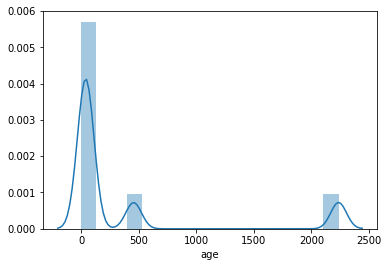

In [15]:
sns.distplot(stats)

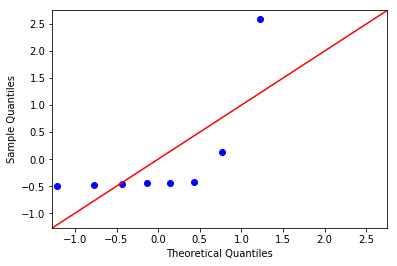

In [75]:
_ = sm.ProbPlot(stats,fit=True).qqplot(line='45')

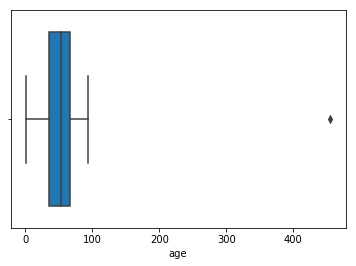

In [6]:
sns.boxplot(x = "age", data=df_personal.dropna(),saturation=True)

In [73]:
#Probably an outlier in the right parf of boxplot graph
max(df_personal.age)

455.0

In the pictures above, we can see **uneven distribution** of values from the Age column. From QQ plot visualization, we can assume right skewed distribution, which holds true(See sns.displot graph). Also there is an **outlier** in the right part of boxplot, which lies in the abnormal distance from others.

In [63]:
df_personal.date_of_birth.value_counts().head(15)

1945-09-13             4
1948-04-26             3
1953-05-08             2
1954-09-17             2
1959-08-27 00 00 00    2
13/11/1960             2
1948-02-03             2
1975-03-07             2
1958-04-04             2
1959-12-05             2
1947-12-02             2
1998-12-24             2
1971-11-08             2
55-07-29               2
1964-01-15             2
Name: date_of_birth, dtype: int64

We can see, that **date_of_birth** column format is *dirty*, there are various types of date format, even with time - datetime.

<p style="font-family: Arial; font-size:2.95em; color:orange; font-style:bold"><br>
Other_train dataset</p><br>

### Reading & descriptive statistics

In [2]:
df_other = pd.read_csv("Datasets/other_train.csv", index_col=0)
df_other.head()

,name,address,query hyperthyroid,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,...,hypopituitary,medical_info,on antithyroid medication,referral source,education-num,occupation,TBG measured,TBG,race,FTI
0,John Kasprzak,"3856 Kayla Track\r\nLake Sara, HI 31241",f,t,HS-grad,f,118.0,1.42,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,other,9.0,Craft-repair,f,?,White,83
1,Stephen Harvey,"34782 Kayla Field\r\nSarahmouth, VT 75984",f,t,HS-grad,f,112.0,1.03,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",FALSE,other,-900.0,Adm-clerical,f,?,White,109
2,Paul Moe,USNV Mooney\r\nFPO AE 29375,f,t,Some-college,f,87.0,0.96,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",f,SVI,10.0,Other-service,f,?,White,90
3,Sarah Johnson,"3633 Bryan Isle\r\nNorth Jamesshire, HI 69484",f,t,Doctorate,f,102.0,0.85,0.0,0.0,...,f,"{'query hypothyroid':'t','T4U measured':'t','p...",f,SVI,16.0,Prof-specialty,f,?,White,119
4,Stacy Martinson,65701 Choi Course Apt. 280\r\nNorth Williamton...,f,t,Some-college,f,129.0,0.97,0.0,0.0,...,f,"{'query hypothyroid':'f','T4U measured':'t','p...",F,SVI,10.0,Other-service,f,?,White,133


In [9]:
df_other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2287 entries, 0 to 2286
Data columns (total 33 columns):
name                         2287 non-null object
address                      2287 non-null object
query hyperthyroid           2277 non-null object
FTI measured                 2278 non-null object
education                    2280 non-null object
lithium                      2277 non-null object
TT4                          2125 non-null float64
T4U                          2042 non-null float64
capital-loss                 2049 non-null float64
capital-gain                 2282 non-null float64
tumor                        2277 non-null object
TSH                          2040 non-null float64
T3                           1805 non-null float64
fnlwgt                       2279 non-null float64
hours-per-week               2278 non-null float64
relationship                 2278 non-null object
sick                         2277 non-null object
workclass                    2140 n

In [79]:
df_other.isnull().sum()

name                           0
address                        0
query hyperthyroid            10
FTI measured                   9
education                      7
lithium                       10
TT4                          162
T4U                          245
capital-loss                 238
capital-gain                   5
tumor                         10
TSH                          247
T3                           482
fnlwgt                         8
hours-per-week                 9
relationship                   9
sick                          10
workclass                    147
TT4 measured                   9
class                          8
marital-status                10
goitre                         8
native-country                 6
hypopituitary                  8
medical_info                  10
on antithyroid medication      9
referral source               11
education-num                 10
occupation                    13
TBG measured                   7
TBG       

In [132]:
df_other.name.value_counts().head()

Gregory Conaway      2
Cynthia Searles      2
Ronda Cummings       2
Ann Hernandez        2
Jeanette Marshall    2
Name: name, dtype: int64

In [134]:
df_other.iloc[[1507,1701]][["name", "address"]]

,name,address
1507,Gregory Conaway,"4583 Carter Ports\nJasonview, ID 39896"
1701,Gregory Conaway,"4583 Carter Ports\nJasonview, ID 39896"


Many **duplicates** in name column with the same addresses - probably un/intentional faults?  
Solution is in dropping others duplicates and leaving only **one** record from duplicates.

## Revealing intentional faults

In [10]:
education_num = df_other["education-num"].dropna().describe()

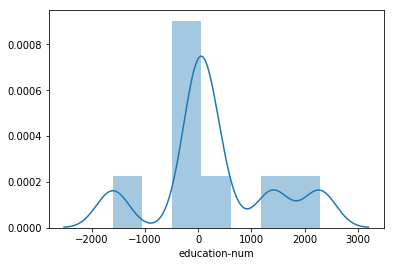

In [11]:
sns.distplot(education_num,kde=True)

In [1]:
sns.boxplot(data=education_num,saturation = True)

NameError: name 'sns' is not defined

**Education-num** is normally distributed, however it contains also non-positive numbers, which can be thought as intentional fault

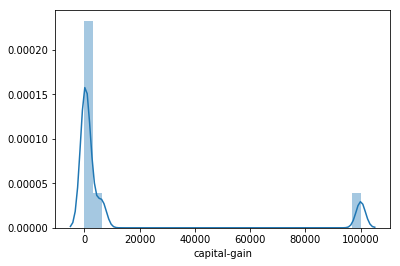

In [14]:
capt_gain = df_other["capital-gain"].dropna().describe()
sns.distplot(capt_gain)

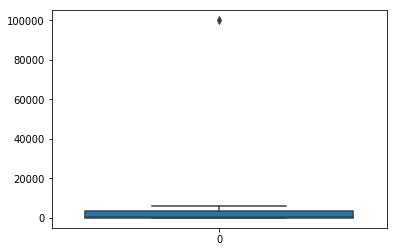

In [16]:
sns.boxplot(data=capt_gain,saturation=True)

From the graphs above, we can *see high level of variance* of **Capital-gain** column, which we assume to be as int. fault.

In [89]:
print(df_other["on antithyroid medication"].unique())

['f' 'FALSE' 'F' 'f.2' nan 'T' 't' 'TRUE']


Incorrect format of True/False values in **on antithyroid medication** column.  
Proposed solution for this problem is in normalization as follows:

> **f,f.2,FALSE** for F  
> **t,TRUE** for T  
> **nan** - dropout or include to results at the end of observation

In [91]:
print(df_other["medical_info"].head())

0    {'query hypothyroid':'f','T4U measured':'t','p...
1    {'query hypothyroid':'f','T4U measured':'t','p...
2    {'query hypothyroid':'f','T4U measured':'t','p...
3    {'query hypothyroid':'t','T4U measured':'t','p...
4    {'query hypothyroid':'f','T4U measured':'t','p...
Name: medical_info, dtype: object


As we can see, it is **JSON** format, so we will have to split it into many columns using json encoder

In [92]:
print(df_other["workclass"].unique())

[' Private' nan '??' ' ?' ' Self-emp-not-inc' ' Local-gov' ' State-gov'
 ' Self-emp-inc' 'federal-gov' 'private' ' Federal-gov' 'local-gov' '?'
 'self-emp-not-inc' 'Nan' 'state-gov' 'self-emp-inc' ' Without-pay']


The same incorrect format again in questionmarks - **'??',' ?'**  
Also, it is worth to mention **underscore** at the very beginning of the items.

In [97]:
print(df_other["class"].value_counts().tail(10))

negative.|992                     1
negative.|448                     1
negative._2532                    1
increased binding protein.|579    1
negative._468                     1
negative.|2179                    1
negative.|1130                    1
negative.|1068                    1
negative._2133                    1
negative.|2607                    1
Name: class, dtype: int64


Column **class** is probably merged together with values, so we will need to split and strip into two new columns *class_status* & *class_val*.  
Stripping will be based on '|' and '_'

## Column distributions & Hormone analysis

![synapsa](https://www.charlottesbook.com/wp-content/uploads/2014/10/hormones-skincare.jpg)

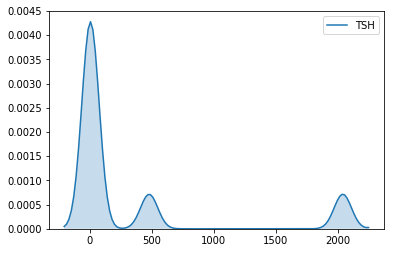

In [12]:
tsh = df_other["TSH"].dropna().describe()
sns.kdeplot(tsh,shade=True)

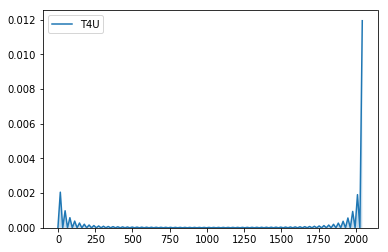

In [13]:
t4u = df_other["T4U"].dropna().describe()
sns.kdeplot(t4u,shade=True)

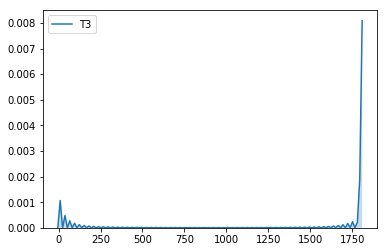

In [14]:
t3 = df_other["T3"].dropna().describe()
sns.kdeplot(t3,shade=True)

## Preprocessing a class column

In [135]:
df_other["class"].head()

0    increased binding protein.|2384
1                      negative.|358
2                     negative.|1247
3                     negative.|1829
4                     negative.|3531
Name: class, dtype: object

In [3]:
df_other["class"] = df_other["class"].str.replace("_","")
df_other["class"] = df_other["class"].str.replace("|", "")
df_other["class"].head()

0    increased binding protein.2384
1                      negative.358
2                     negative.1247
3                     negative.1829
4                     negative.3531
Name: class, dtype: object

In [4]:
df_other[["class", "class_protein"]] = df_other["class"].str.split(".",expand = True)
df_other[["class", "class_protein"]].head()

,class,class_protein
0,increased binding protein,2384
1,negative,358
2,negative,1247
3,negative,1829
4,negative,3531


In [ ]:
sns.catplot(x="TSH", y="T4U", hue = "class", data=df_other.dropna(),height=10)
plt.title("Hormone TSH vs T4U Correlation")

In [18]:
df_other["class"].value_counts()

negative                     2173
increased binding protein      97
decreased binding protein       9
Name: class, dtype: int64

Unique value with counts in the cleansed column **class**

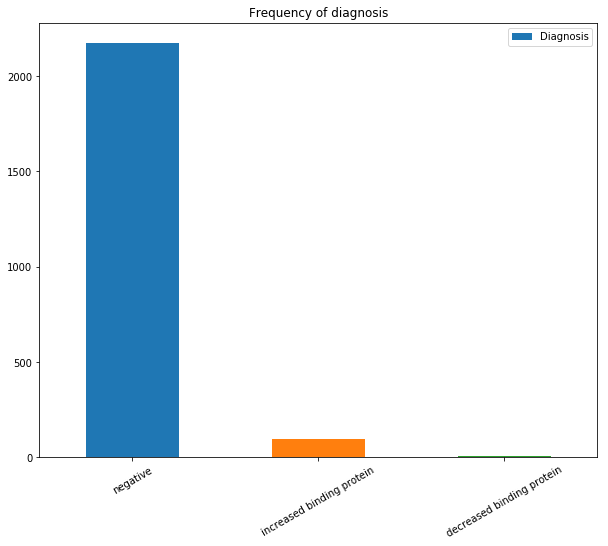

In [23]:
df_other["class"].value_counts().plot(kind='bar', label='Diagnosis', rot=30, figsize=(10,8))
plt.legend()
plt.title('Frequency of diagnosis');

Mostly, there is a negative test that **prevails** over others. But that does not mean that person is healthy, there are also many factors e.g goitre,tumor...

# Formulated hypothesis

## The First hypothesis

The first hypothesis:    
>**Is there any correlation between TSH & T4U hormone levels?**  

Let's look at using a **T test**.

Text(0.5,1,'TSH & T4U dependendies')

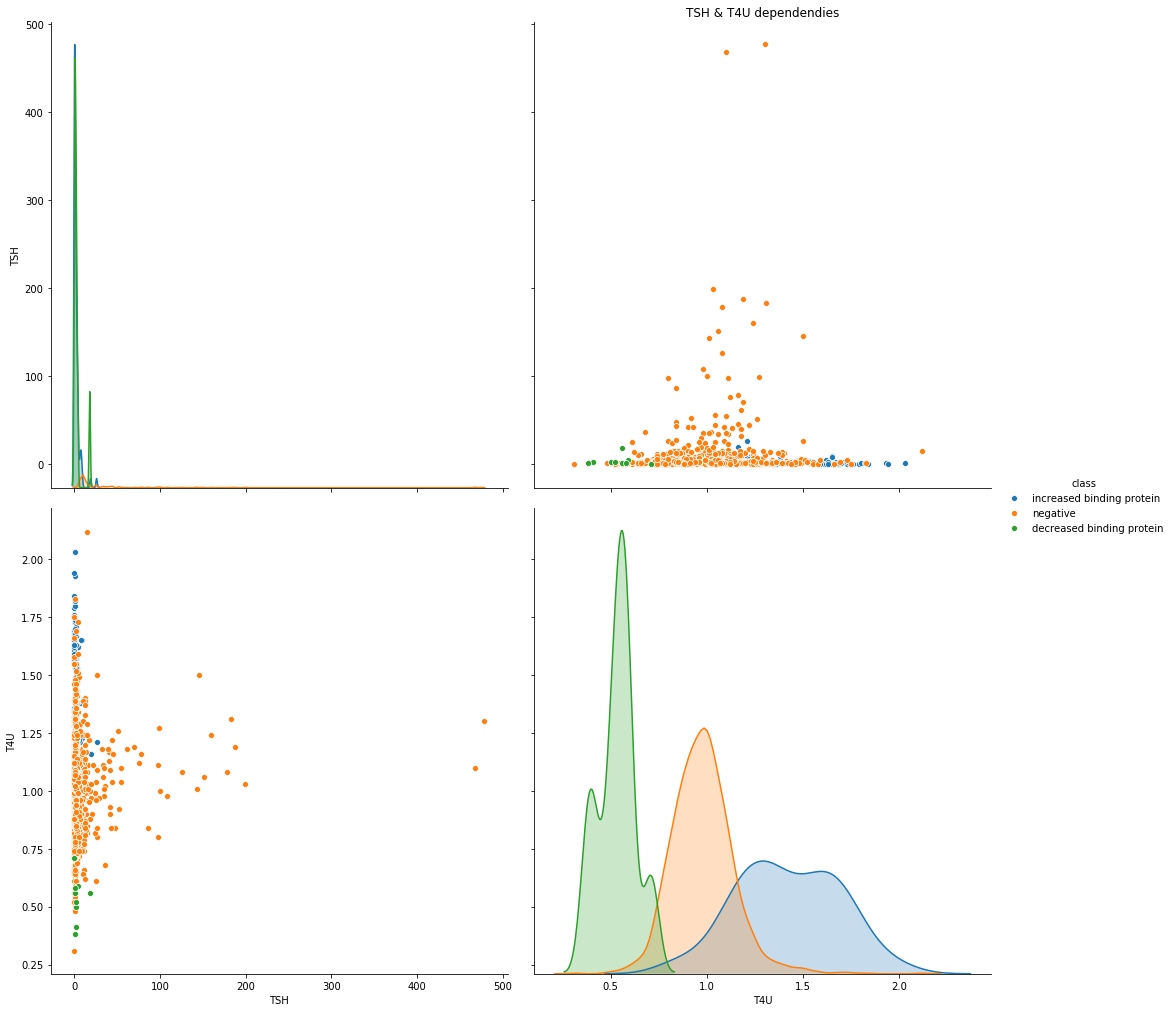

In [160]:
data = df_other[["TSH","T4U", "class"]].dropna()
sns.pairplot(data,hue="class",height=7)
plt.title("TSH & T4U dependendies")

As we can see there are some **dependencies beetwen TSH and T4U**, mainly in increased and decreased binding protein. Pairplot clearly shows high levels of TSH and low levels of T4U which is called **hypothyroidis** and vice versa - **hyperthyroidis**.

As we suppose a correlation between hormones so we have to choose **paired T-test**. But first we need to check distribution of each levels.

***The hypothesis level of confidence is p = 0.05***

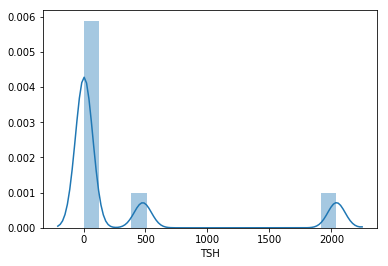

In [161]:
TSH = df_other["TSH"].dropna()
sns.distplot(TSH.describe())

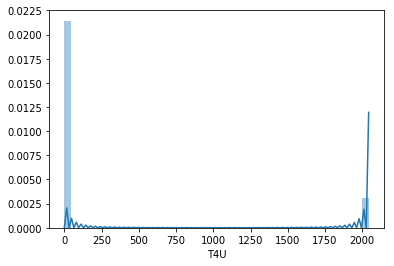

In [162]:
T4U = df_other["T4U"].dropna()
sns.distplot(T4U.describe())

It is very clear even for a laic that graph distributions are roughly **right skewed** neglecting outliers. Thus, we need to normalize it.

In [163]:
#Function that clears outliers
def normalize(data):
    q1 = data.quantile(0.25) - 1.5 * stats.iqr(data)
    q2 = data.quantile(0.75) + 1.5 * stats.iqr(data)
    
    #We return filter
    return data[(data > q1) & (data < q2)]

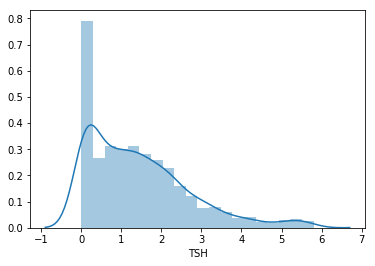

In [164]:
TSH = normalize(TSH)
sns.distplot(TSH)

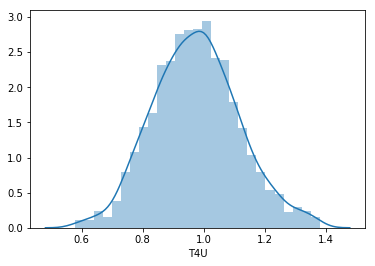

In [165]:
T4U = normalize(T4U)
sns.distplot(T4U)

From now, we can see almost **perfect** Normal distribution for T4U and **smooth right skewed** for TSH hormone level.

Text(0.5,1,'TSH QQ-plot')

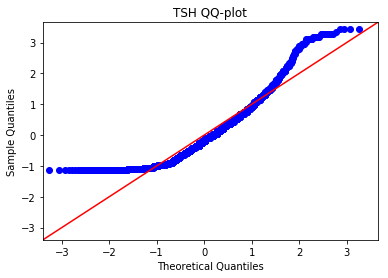

In [166]:
_= sm.ProbPlot(TSH,fit=True).qqplot(line='45')
plt.title("TSH QQ-plot")

Text(0.5,1,'T4U QQ-plot')

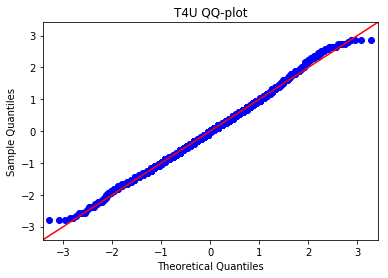

In [167]:
_ = sm.ProbPlot(T4U, fit=True).qqplot(line='45')
plt.title("T4U QQ-plot")

In [168]:
T4U = T4U[:1824]
stats.ttest_rel(a=TSH,b=T4U)

Ttest_relResult(statistic=15.491817818170443, pvalue=6.005291530109305e-51)

### The first hypothesis conclusion

So our hypothesis -> *the correlation between TSH & T4U* is **statistically significant** as result of p-value that is far less than 0.05

## The Second hypothesis

Let's look at T3 levels affected by TSH.
The next hypothesis:    
>**Is there any correlation between TSH and T3 levels?**

Text(0.5,1,'TSH & T3 dependencies')

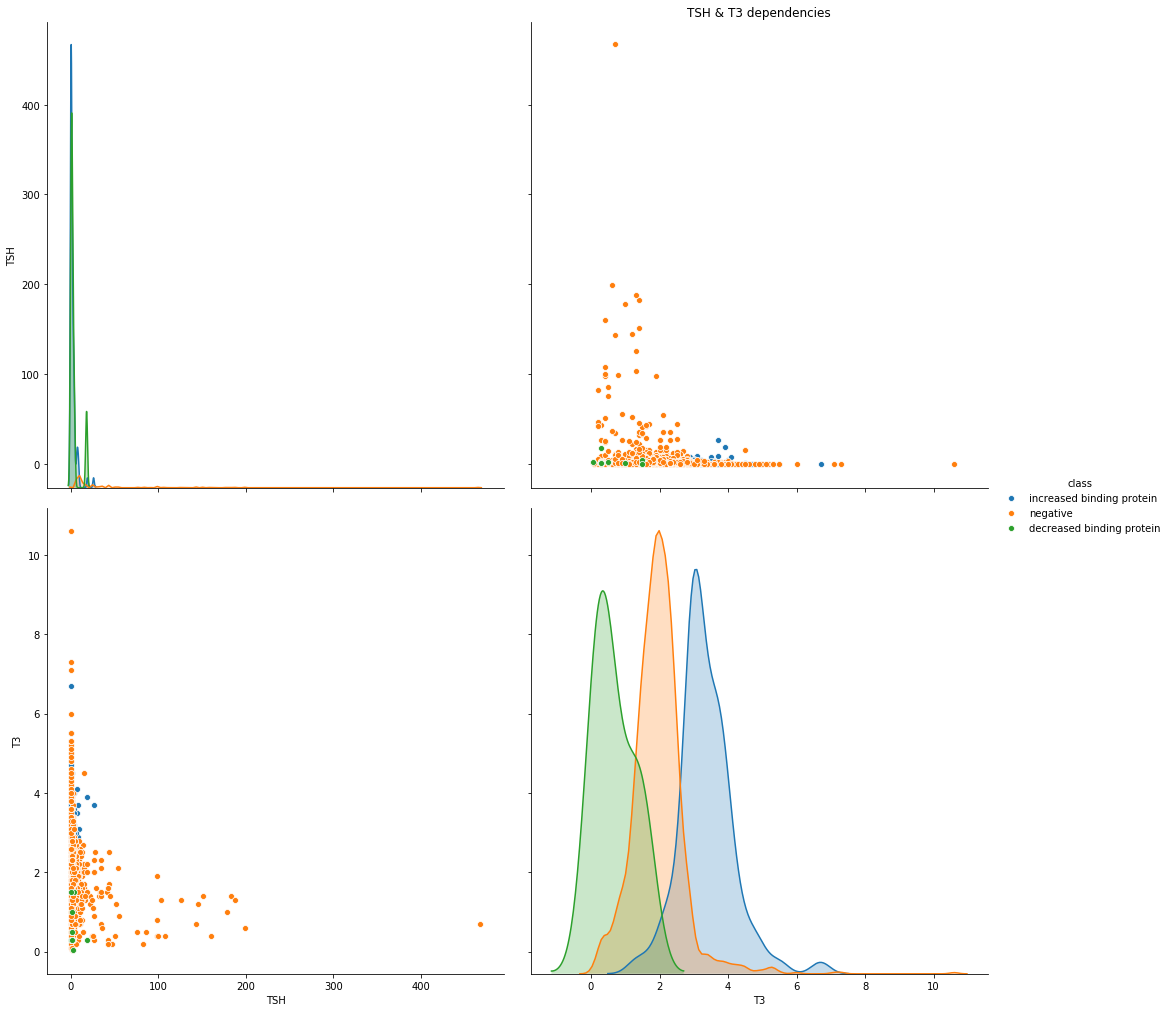

In [169]:
data = df_other[["TSH", "T3", "class"]].dropna()
sns.pairplot(hue = "class", data = data, height = 7)
plt.title("TSH & T3 dependencies")

As we can see there are some **dependencies beetwen TSH and T3**, mainly in increased and decreased binding protein. Pairplot clearly shows high levels of TSH and low levels of T3 which is called **hypothyroidis** and vice versa - **hyperthyroidis**.
This is almost the same as pairplot for T4U hormone. Despite the fact pairplots look very similar, T3 and T4U are different hormones.

As we suppose a correlation between hormones so we have to choose **paired T-test**. But first we need to check distribution of each levels.

***The hypothesis level of confidence is p = 0.05***

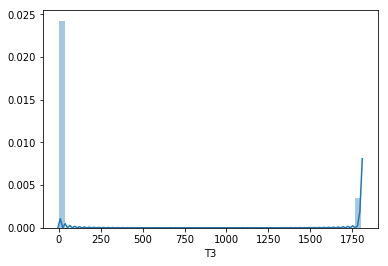

In [180]:
T3 = df_other["T3"].dropna()
TSH = df_other["TSH"].dropna()
TSH = normalize(TSH)
sns.distplot(T3.describe())

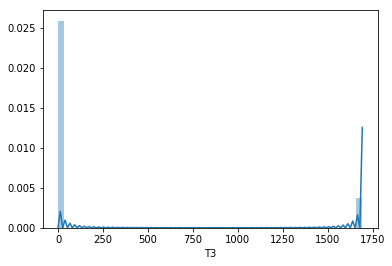

In [181]:
T3 = normalize(T3)
sns.distplot(T3.describe())

Text(0.5,1,'T3 levels')

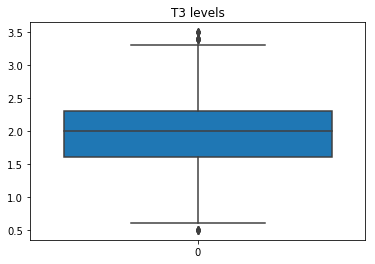

In [182]:
sns.boxplot(data=T3,saturation=True)
plt.title("T3 levels")

T3 levels before and after normalization have **the same shape** of distribution.

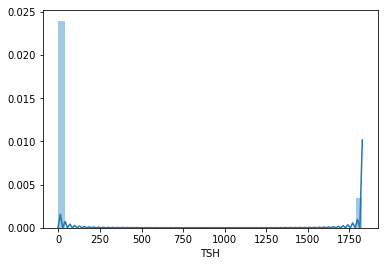

In [183]:
sns.distplot(TSH.describe())

Text(0.5,1,'TSH levels')

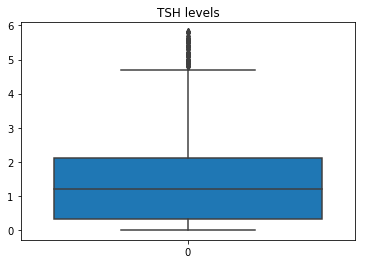

In [184]:
sns.boxplot(data=TSH,saturation=True)
plt.title("TSH levels")

**TSH** levels are left skewed, with few outliers. Let's check QQ-plots for TSH & T3

Text(0.5,1,'T3 QQ-plot')

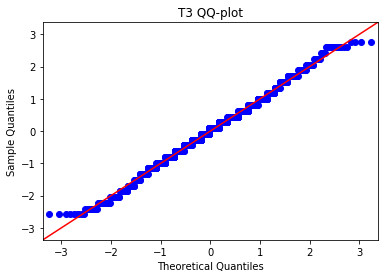

In [185]:
_= sm.ProbPlot(T3,fit=True).qqplot(line='45')
plt.title("T3 QQ-plot")

Text(0.5,1,'TSH QQ-plot')

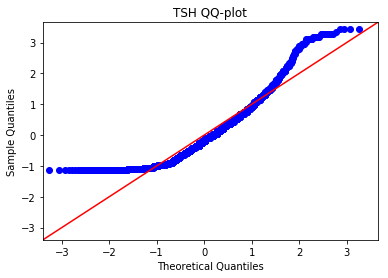

In [186]:
_ = sm.ProbPlot(TSH,fit=True).qqplot(line="45")
plt.title("TSH QQ-plot")

In [187]:
#T test seeks to have the same number of rows, so we cut the tail of TSH
TSH = TSH[:len(T3)]

In [188]:
stats.ttest_rel(a=TSH,b=T3)

Ttest_relResult(statistic=-15.831545488405196, pvalue=9.590380479920326e-53)

### The second hypothesis conclusion

Our second hypothesis -> *the correlation between TSH & T3* is **statistically significant** as result of p-value that is the same as *Hypothesis \#1* far less than 0.05

# Hormones correlation

In [25]:
#Dropping one record with glitching data
#df_corr=df_other.drop(102)
df_corr=df_other.drop(102)

In [27]:
d = {'negative' : 0, 'increased binding protein' : 1, 'decreased binding protein' : -1}
f = {'f' : 0, 't' : 1}
df_corr['class']=df_corr['class'].map(d)
df_corr['tumor']=df_corr['tumor'].dropna().map(f)
df_corr['goitre']=df_corr['goitre'].dropna().map(f)
df_corr['sick']=df_corr['sick'].dropna().map(f)
df_corr['lithium']=df_corr['lithium'].dropna().map(f)
df_corr['query hyperthyroid']=df_corr['query hyperthyroid'].dropna().map(f)
corr_matrix = df_corr.corr()

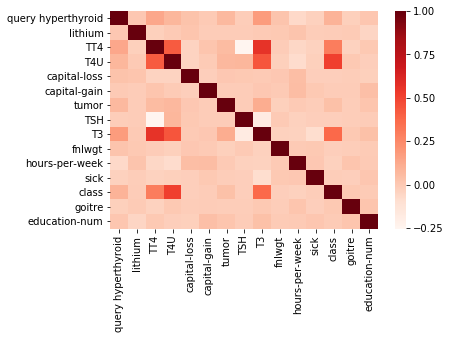

In [28]:
sns.heatmap(corr_matrix, cmap='Reds')

As we can see from the heatmap above, there are positive and negative correlations (dependencies) among many hormone levels:
> 1) **TT4** correlates with **T4U** (which is logical, because TT4 is total T4 and T4U - unbound part of TT4;  
> 2) **TT4** also strongly correlates with **T3**, because T3 is mostly produced from T4, so usually the more T4 we have, the more T3 will be present.  
> 3) **TT4** has moderate correlation with **class** field (which is our diagnosis), but it _has_ that correlation, which already is important.  
> 4) **TT4** has negative correlation with **TSH**, which fully matches with medical information on Thyroid hormones production: The less T4 human organism detects, the more TSH hormone it will produce to force Thyroid gland to increase T4 synthesis. **Same** applies for **T3** and **TSH** levels respectively, but not directly - level of T3, as we already mentioned before, depends on the level of T4, so T3 in this case could be called a "secondary" hormone;  
> 5) **T4U** also correlates with **T3** because of reasons, described earlier.
> 6) **The most important indicators** are strong and moderate correlations between **class** and **T4U**, **class** and **T3** respectively, which could really help us to indicate, if our patient is healthy or not.  

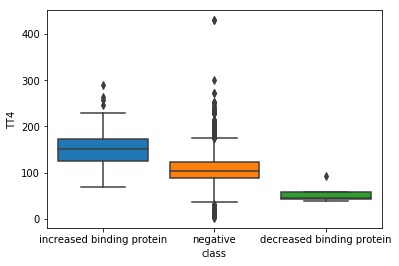

In [31]:
sns.boxplot(x="class", y="TT4", data=df_other,saturation=True)

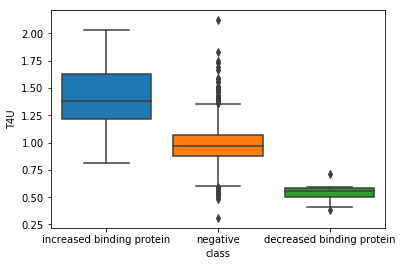

In [37]:
sns.boxplot(x="class", y="T4U", data=df_other,saturation=True)

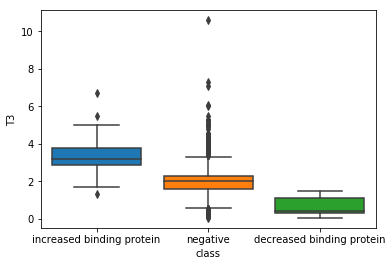

In [36]:
sns.boxplot(x="class", y="T3", data=df_other,saturation=True)

From the graphs above, you can see **specific hormone distribution**, with the results of diagnosis. 

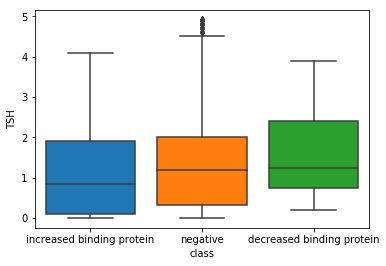

In [39]:
sns.boxplot(x="class", y=df_other[(df_other["TSH"]<5)]['TSH'], data=df_other,saturation=True)

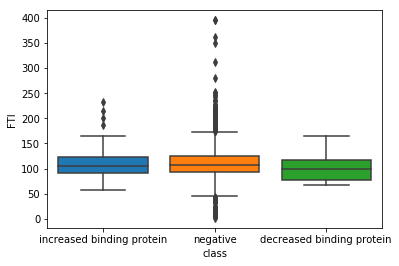

In [41]:
sns.boxplot(x="class", y=pd.to_numeric(df_other["FTI"],errors='coerce'), data=df_other,saturation=True)

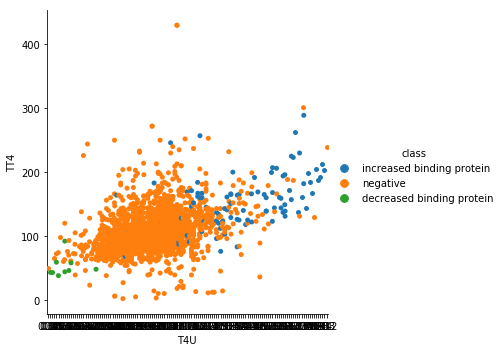

In [42]:
sns.catplot(x="T4U",y="TT4",hue='class',data=df_other)

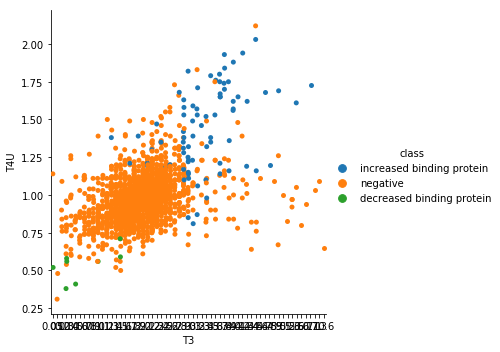

In [43]:
sns.catplot(x="T3",y="T4U",hue='class',data=df_other)

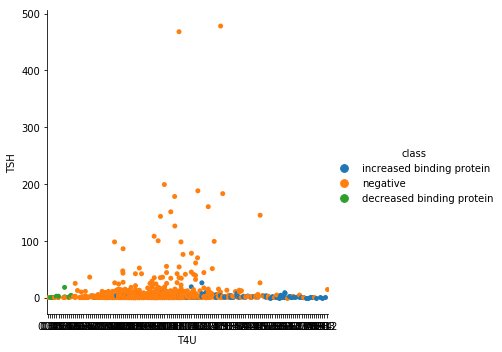

In [44]:
sns.catplot(x="T4U",y="TSH",hue='class',data=df_other)

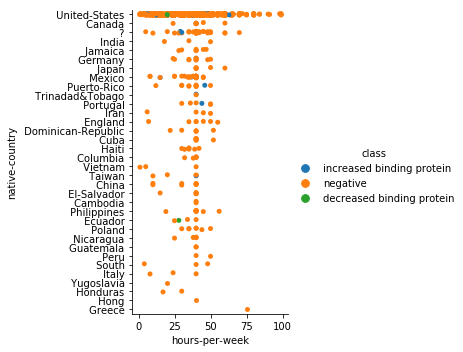

In [45]:
sns.catplot(x="hours-per-week",y="native-country",hue='class',data=df_other)

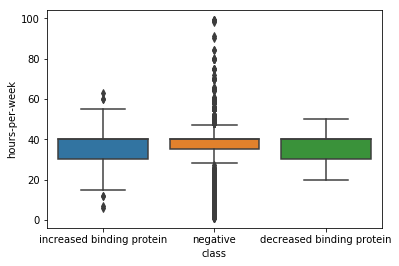

In [46]:
sns.boxplot(x="class",y="hours-per-week",data=df_other.drop(102))

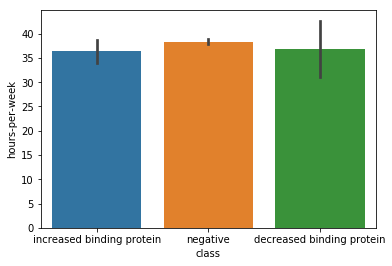

In [47]:
sns.barplot(x="class",y="hours-per-week",data=df_other.drop(102))

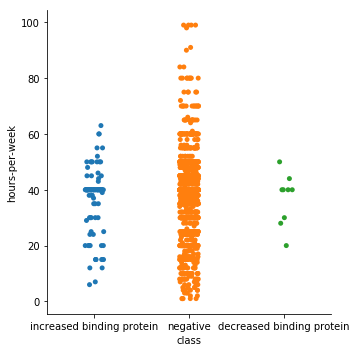

In [48]:
sns.catplot(x="class",y="hours-per-week",data=df_other.drop(102))

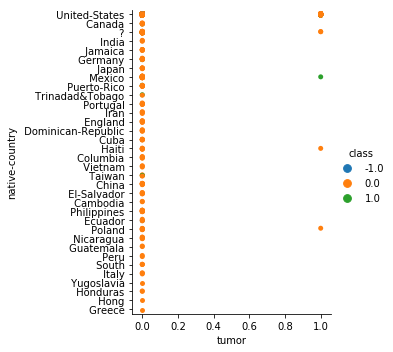

In [49]:
sns.catplot(x="tumor",y="native-country",hue='class',data=df_corr)

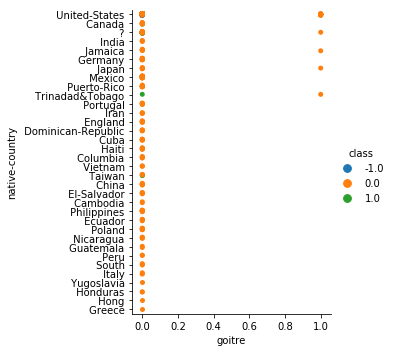

In [50]:
sns.catplot(x="goitre",y="native-country",hue='class',data=df_corr)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017D235072E8>,
      dtype=object)

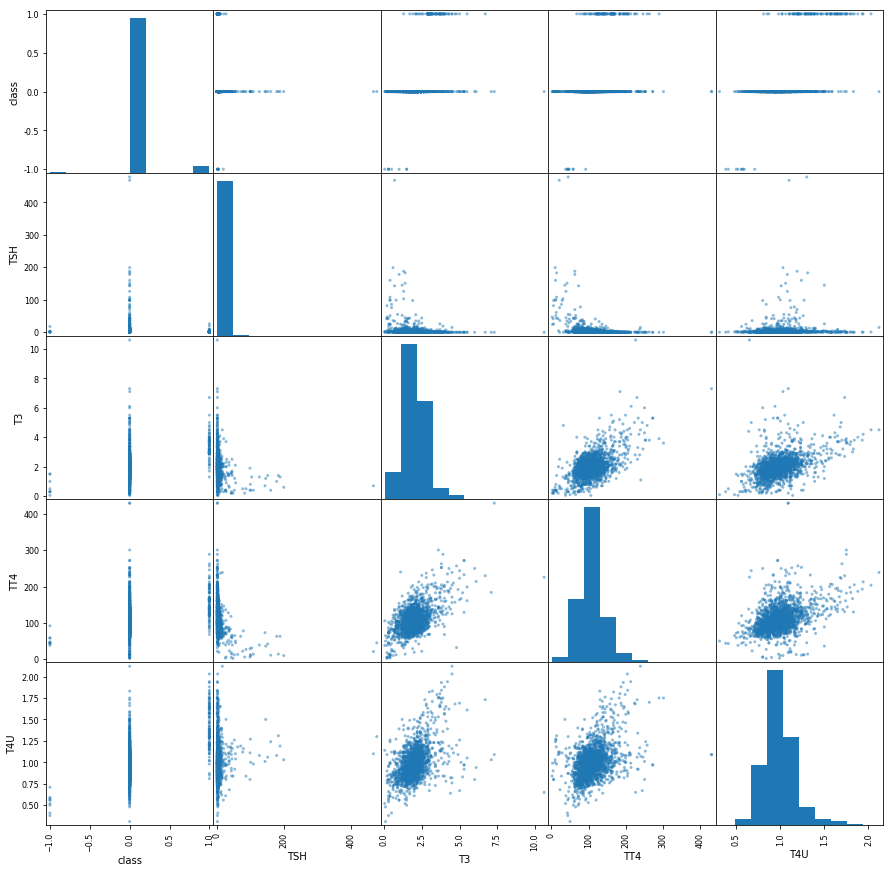

In [51]:
pd.scatter_matrix(df_corr[['class','TSH','T3','TT4','T4U']], figsize = (15, 15))

<p style="font-family: Arial; font-size:2.95em; color:indigo; font-style:bold"><br>
Conclusion</p><br>

In this exploratory analysis we have performed a brief view on the data and mainly identified faulty mistakes as well as correlation between hormones using **T-test** and **Pearson correlation**.  
We've found out a lot of new dependencies among many columns in both datasets and our focus is on hormone levels at most.

In the next step, we will preprocess data with many sophisticated functions to successfully **predict a diagnosis** based on the H-levels.